In [92]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [93]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [94]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [95]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [96]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [97]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [98]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [99]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)
session

# Exploratory Precipitation Analysis

In [100]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).\
    order_by((measurement.date).desc()).first()
recent_date[0]

'2017-08-23'

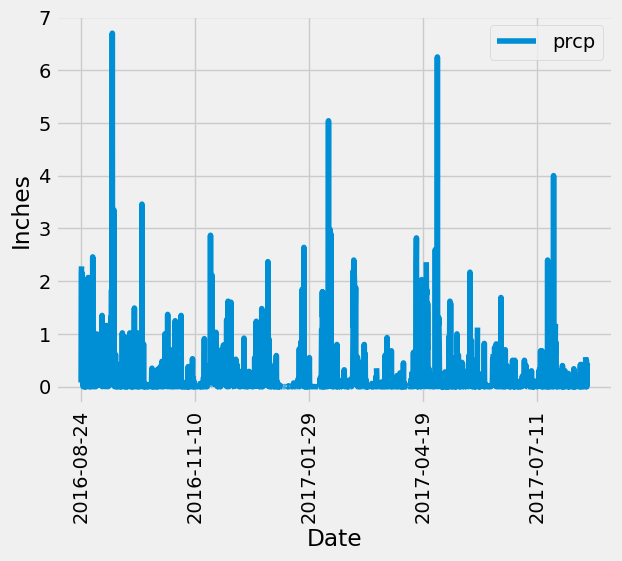

In [101]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set (2017-08-23).
start_date = '2016-08-23'

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= start_date).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_data)

# Sort the dataframe by date
prcp_df = prcp_df.set_index("date")
prcp_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.legend(loc='upper right',labels=['prcp'])
plt.show()

In [102]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [103]:
# Design a query to calculate the total number of stations in the dataset
total_stations= session.query(station.station).count()
total_stations

9

In [104]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
    order_by(func.count(measurement.station).desc()).\
    group_by(measurement.station)

for row in active_stations:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


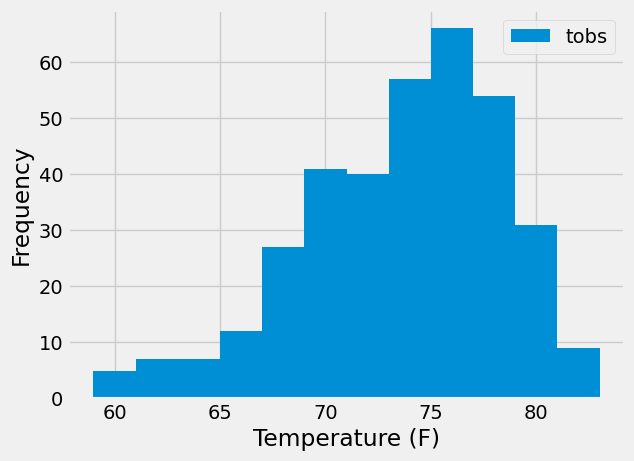

In [107]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
recent_date_active = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == active_station_id).\
    order_by(measurement.date.desc()).first()
recent_date_active[0]

# Most recent date is 2017-08-18
start_date_active = '2016-08-18'
tobs_data = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == active_station_id).\
    filter(measurement.date >= start_date_active)
tobs_df = pd.DataFrame(tobs_data)
tobs_df = tobs_df["tobs"]

# Plot histogram
plt.hist(tobs_df, bins=12)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.legend(loc='upper right', labels=['tobs'])
plt.show()

# Close Session

In [108]:
# Close Session
session.close()